In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In this Jupyter Notebook, I will cover the following topics in the respective order.
- Load Dataset
- Data Cleaning
- Data Analysis
- Sentimental Analysis using NLTK  


## About Dataset

The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews). The author has mentionned that the name of the E-commerce platform will not be disclosed. To maintain the anonymity of the real-world shop, it is referred to as 'retailer' in the dataset.

This dataset includes 23486 rows and 10 feature variables. Each row represents customer's purchase along with the review they posted on the E-commerce site.

## Load Datatset

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.drop("Unnamed: 0", axis = 1, inplace=True)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


**LEGEND of the Variables**
- `Clothing ID:` Integer Categorical variable that refers to the specific piece being reviewed.
- `Age:` Positive Integer variable of the reviewers age.
- `Title:` String variable for the title of the review.
- `Review Text:` String variable for the review body.
- `Rating:` Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- `Recommended IND:` Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- `Positive Feedback Count:` Positive Integer documenting the number of other customers who found this review positive.
- `Division Name:` Categorical name of the product high level division.
- `Department Name:` Categorical name of the product department name.
- `Class Name:` Categorical name of the product class name.

In [3]:
# The dataset contains few NaN values...but the features have the correct data types. 
# Now, let's proceed to the data cleaning step.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


## Data Cleaning

In [4]:
# The following code shows the number of NaN values in each column
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
# Here are the helper functions to get the categorical clothing names from the 'Review Text'
def get_class_name(row):

    reviews = row['Review Text']
    
    if type(row['Class Name'])==str or type(reviews)!=str:
        return row['Class Name']
    
    class_name = ''
    for word in row['Review Text'].split():
        if re.search(r"\bhoodie\b|\bsweatshirt\b|\beberjey\b|\btights\b|\bleggings\b|\bleg\b|\bsocks\b", word): 
            class_name = re.sub(r'[^\w\s]','',word)
            
            if re.search(r'\bhoodie\b|bsweatshirt\b', class_name):
                return 'Sweaters'
            elif 'eberjey' in class_name:
                return 'Sleep'
            else:
                return 'Legwear'
    
            
def get_department_name(row):

    reviews = row['Review Text']
    if type(row['Department Name'])==str or type(reviews)!=str:
        return row['Department Name']
    
    for word in reviews.split():
        if re.search(r"\bhoodie\b|\bsweatshirt\b|\beberjey\b", word):
            return 'Tops'
        elif re.search(r"\btights\b|\bleggings\b|\bleg\b|\bsocks\b", word):
            return'Bottoms'
        
# Now, let's extract the category clothes name from 'Review Text' to fill in the NaN values in the 3 following columns 
df['Division Name'] = df['Division Name'].apply(lambda name: df['Division Name'].mode()[0] if type(name)!=str else name)
df['Department Name'] = df.apply(lambda row: get_department_name(row), axis = 1)
df['Class Name'] = df.apply(lambda row: get_class_name(row), axis = 1)

In [6]:
# Create 'Age Group' column
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89', '90+']
df['Age Group'] = pd.cut(df.Age, bins, labels = labels, right = False)

In [7]:
# Count the length of the 'Review Text' posted by each customer
df['Review Length'] = df['Review Text'].apply(lambda review: len(review) if type(review)==str else 0)

## Data Analysis

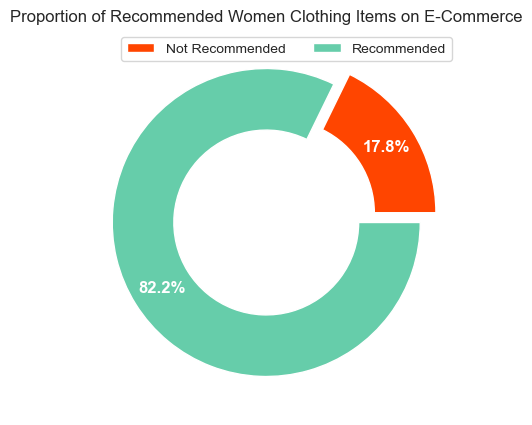

In [8]:
plt.figure(figsize = (7,5))
plt.pie(df.groupby('Recommended IND')['Rating'].count(),autopct='%.1f%%',
        colors = ['#FF4500','#66CDAA'],
        textprops = {'color':'white', 'weight':'bold', 'fontsize':12}, pctdistance = 0.8, explode = [0.12, 0],
        wedgeprops = dict(width=0.4))
plt.legend("bottom center", ncol = 2, labels = ['Not Recommended', 'Recommended'])
plt.title('Proportion of Recommended Women Clothing Items on E-Commerce');

In the given Women E-commerce dataset, 
- `82.2%` of the customers **recommend** the items they bougth and
- `17.8%` of the customers **do not recommend** the items

### 1. Data Analysis by Age

### 1.1 Which age group left the most number of reviews?

The following output (using `.describe()` function) gives an overview of the age distribution of the buyers. The minimum and the maximum ages are **18 years old and 99 years old**. On average, the customers who used the Women Clothing E-Commerce are in their 40s.

In [9]:
df.Age.describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [10]:
def plot_recommentation(feature, ax, order_categories = True):
    """
    This function plots the 'pyramid chart' of the given feature by putting the 'recommended' bar and the 'not recommended' bar
    side by side on the given axis.
    
    :param [feature]: name of the feature to plot
    :param [ax]: given axis where the barplot will be
    :param [order_categories]: by default, the category values are ordered in the descending order for a better visualisation
    :type [feature]: string
    :type [ax]: plt.subplots() object
    :type [order_categories]: boolean
    
    :return : pyramid chart
    :rtype: matplotlib.pyplot (plt) 
    """
    # prepare the data
    recommended = df[df['Recommended IND']==1].groupby(feature)['Rating'].count()
    not_recommended = -df[df['Recommended IND']==0].groupby(feature)['Rating'].count()
    
    if order_categories:
        recommended.sort_values(ascending=False, inplace = True)
        recommended.sort_values(ascending=False, inplace = True)
    
    # plot
    ax.barh(recommended.index, recommended.values, color = '#66CDAA', label = 'Recommended')
    ax.barh(not_recommended.index, not_recommended.values,  color = '#FF4500', label = 'Not Recommended')
    ax.set(xlabel = 'Frequency Count', ylabel = feature)

    # rename the label on the left x-axis
    labels = [int(xtick) for xtick in ax.get_xticks().tolist()]
    labels[1]=1000
    ax.set_xticklabels(labels)
    ax.legend()

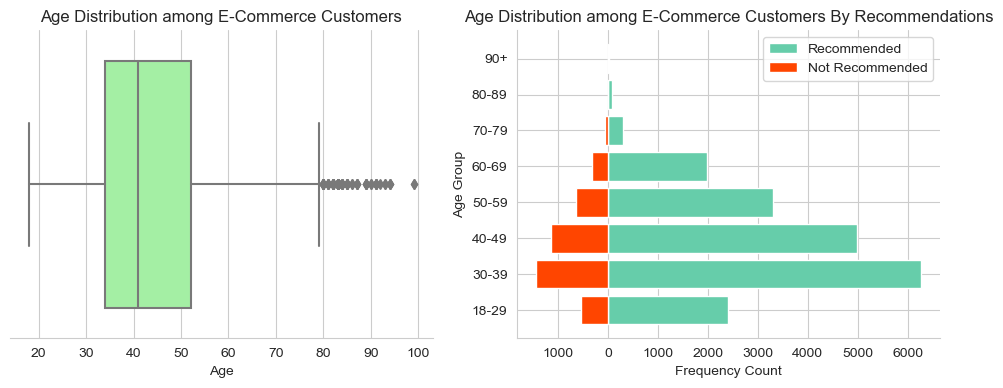

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))

# Boxplot
sns.set_style('whitegrid')
sns.boxplot(data=df['Age'], orient="h", color='#98FB98', ax=ax1)
ax1.set(title = 'Age Distribution among E-Commerce Customers', yticklabels = [], xlabel = 'Age')
ax1.spines[['left','right', 'top']].set_visible(False)

# Barplot
plot_recommentation('Age Group', ax2, False)
ax2.set_title('Age Distribution among E-Commerce Customers By Recommendations')
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

plt.show()

- From the boxplot above, the age range of the E-commerce customers is mostly between 18 and 80 years old. There are few outliers of customers in their 80+ years old. The average age of the shoppers is round 40 years old.
- The distribution plot on the right side shows that the customers in their 30s and 40s are the dominant reviewers. 
- In all age group, the customers are more likely to recommend the items they bougth.
- As the age grow, the number of posted reviews decrease.
___
Now, it would be interesting to know **which age group is more likely to recommend the clothing items**. To do so, we need to create a cross table to plot a horizontal `100% stacked bar chart` for each age range.

### 1.2.Which age group is more likely to recommend the clothing items?
For the cross table, I use the `pd.crosstab` to group data by `Age Group` and then by `Recommended IND`. Setting `normalize` to `index` will compute the proportion of the frequency count in percentage, which gives the 100 % stacked bar chart for each age group.

In [12]:
# Create Cross Table
percent_recommended = pd.crosstab(index = df['Age Group'], columns = df['Recommended IND'], normalize = 'index')
percent_recommended.rename(columns = {0:'Not Recommended', 1:'Recommended'}, inplace = True)
percent_recommended

Recommended IND,Not Recommended,Recommended
Age Group,,
18-29,0.182532,0.817468
30-39,0.186445,0.813555
40-49,0.187531,0.812469
50-59,0.162361,0.837639
60-69,0.144035,0.855965
70-79,0.181319,0.818681
80-89,0.085106,0.914894
90+,0.333333,0.666667


In [13]:
def plot_stackBars(serie, list_colors, label_position, figsize, title, relocate_legend = True):
    '''
    This function creates a horizontal 100% stack bar chart for the given serie.
    
    :param [serie]: pd.crosstab/serie
    :param [list_colors]: list of colors for customizing the bars
    :param [label_position]: integer to reposition the text label inside the bar
    :param [figsize]: size of the plot figure
    :param [title]: title for the plot
    :param [relocate_legend]: by default, the legend box is located outside the bar figure on the right hand side
    :type [serie]: pd.Series (or pd.crosstab)
    :type [list_colors]: list
    :type [label_position]: integer
    :type [figsize]: tuple of integers ex: (x, y)
    :type [title]: string
    :type [relocate_legend]: boolean
    
    :return: horizontal 100 % stacked bars
    :rtype: plt
    '''
    # Plot 100% stack bars
    ax = serie.plot(kind = 'barh', stacked = True, figsize = figsize, color = list_colors)
    ax.spines[['left','right', 'top']].set_visible(False)
    ax.grid(False)
    
    # add percentage inside each bar
    for n, x in enumerate([*serie.index.values]):
        for (proportion, y_loc) in zip(serie.loc[x],
                                       serie.loc[x].cumsum()):
            
            plt.text(x=(y_loc - proportion) + (proportion / 2)-label_position,
            y=n - 0.11,
            s=f'{np.round(proportion * 100, 1)}%', 
            color="white",
            fontsize=11,
            fontweight="bold")
    
    # customize labels and title
    plt.title(title)
    plt.xlabel('Proportion')
    if relocate_legend:
        plt.legend(loc = "upper right", bbox_to_anchor=(1.5, 1))
        
    plt.show()

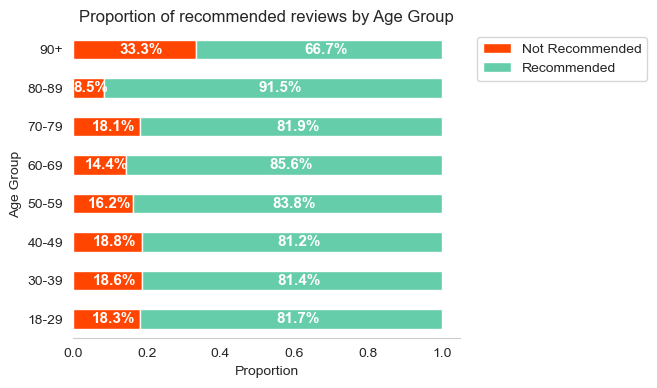

In [14]:
plot_stackBars(serie = percent_recommended, 
               list_colors = ['#FF4500','#66CDAA'], 
               label_position = 0.040, 
               figsize = (5, 4),
               title = "Proportion of recommended reviews by Age Group")

The buyers in their `80s` (91.5%) are more likely to recommend items online, followed by people in their `60s` (85.6%) and `50s` (83.8%). Overall, most of the shoppers are satisfied with their purchases: more than 80% of the online items are recommended by any age group. 

Notice that the customers in the 90s have the highest proportion (33.3%) of not being happy with their items. My speculation is that people in their 90s are not familiar with technologies and they might not have done their research properly before doing their online shopping.
___
### 1.3.Which women clothing item is the most reviewed in each age group?

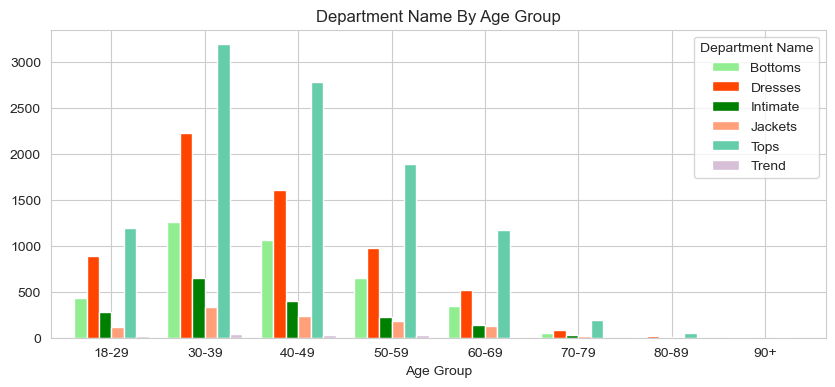

In [15]:
age_dep= df.groupby(['Age Group', 'Department Name'])['Rating'].count().unstack()
age_dep.plot(kind = 'bar', figsize = (10,4), width=0.8,
             color = ['#90EE90', '#FF4500', '#008000', '#FFA07A', '#66CDAA','#D8BFD8'])

plt.xticks(rotation = 0)
plt.title('Department Name By Age Group')
plt.show()

From the bar chart above, we observe that
- the customers in their 30s and 40s left the most reviews for all category items
- `Tops`, `Dresses` and `Bottoms` are the top 3 dominant reviewed items in all age group
- `Trend` and `Jacket` are the least reviewed items by buyers
- the buyers in their 70s seems to review only `Tops`, `Dresses` and `Bottoms`
- the buyers in their 80s seem to review only `Tops` and `Dresses`

### 2.Data Analysis By Recommendations

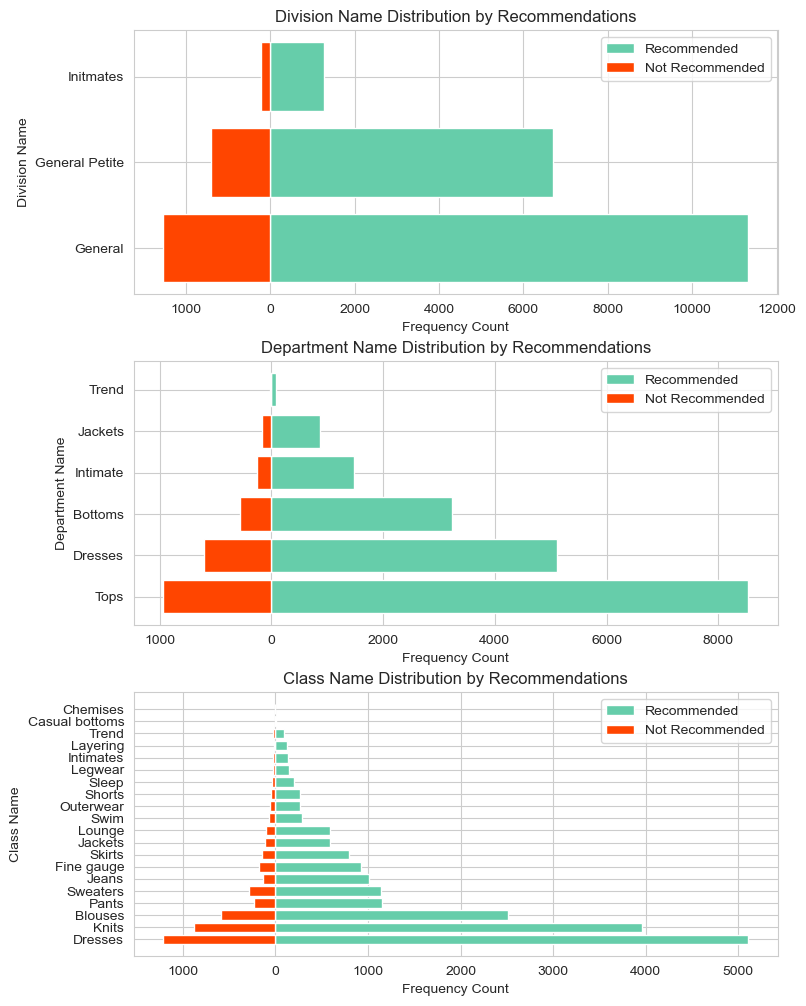

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (8,10))

plot_recommentation('Division Name', ax1)
ax1.set_title('Division Name Distribution by Recommendations')

plot_recommentation('Department Name', ax2)
ax2.set_title('Department Name Distribution by Recommendations')

plot_recommentation('Class Name', ax3)
ax3.set_title('Class Name Distribution by Recommendations')

plt.tight_layout(pad=0.5)
plt.show()

The three pyramid charts above give 3 informations: 
1. What are the unique values for each feature?
2. Is the item being recommended?
3. Which items are the most reviewed on the Women Clothing E-commerce for each category?

Again, most of the clothing items are recommended by buyers.
- The division category with the most reviews is `General`.
- The department categories with the most reviews are `Tops`, `Dresses` and `Bottoms` in the respective descending order.
- The class categories with the most reviews are `Dresses`, `Knits` and `Blouses` in the respective descending order.

### 3.Data Analysis By Rating

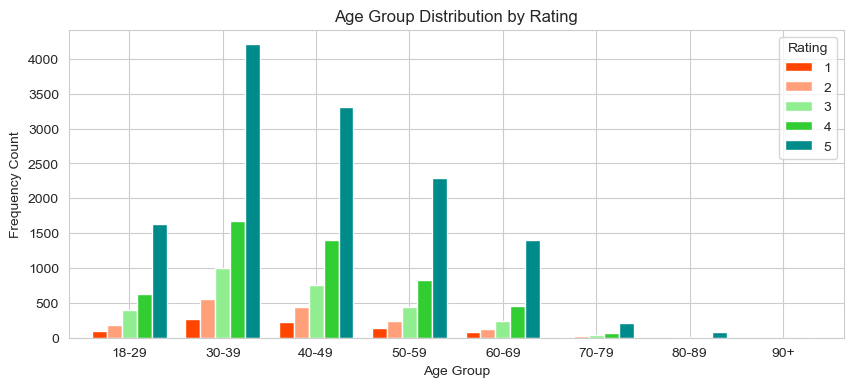

In [17]:
age_rating= df.groupby(['Age Group', 'Rating'])['Clothing ID'].count().unstack()
age_rating.plot(kind = 'bar', figsize = (10,4), width=0.8,
             color = ['#FF4500', '#FFA07A', '#90EE90', '#32CD32', '#008B8B'])

plt.xticks(rotation = 0)
plt.ylabel('Frequency Count')
plt.title('Age Group Distribution by Rating')
plt.show()

Alternatively, we can plot the `100 % stack bar` to visualize the distribution of the ratings by age group. Now, we can compare which age group is more likely to give a 1-star or 5-star rating.

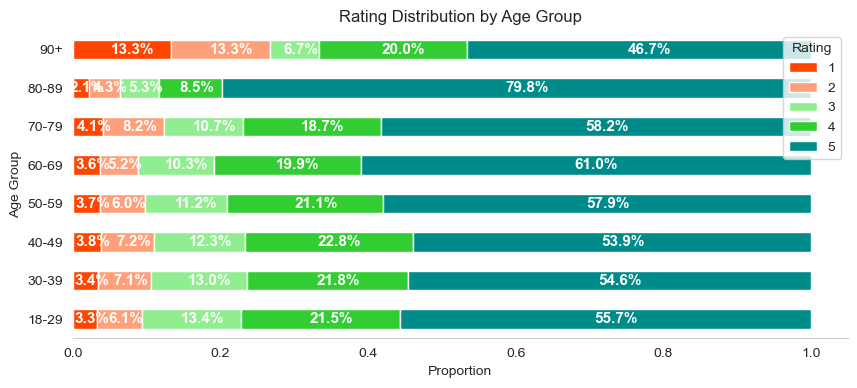

In [18]:
age_rating = pd.crosstab(index = df['Age Group'], columns = df['Rating'], normalize = 'index')
plot_stackBars(serie = age_rating, 
               list_colors = ['#FF4500', '#FFA07A', '#90EE90', '#32CD32', '#008B8B'], 
               label_position = 0.015, 
               figsize = (10, 4),
               title = "Rating Distribution by Age Group", 
               relocate_legend = False)

Here is the distribution of the rating by the clothing department.

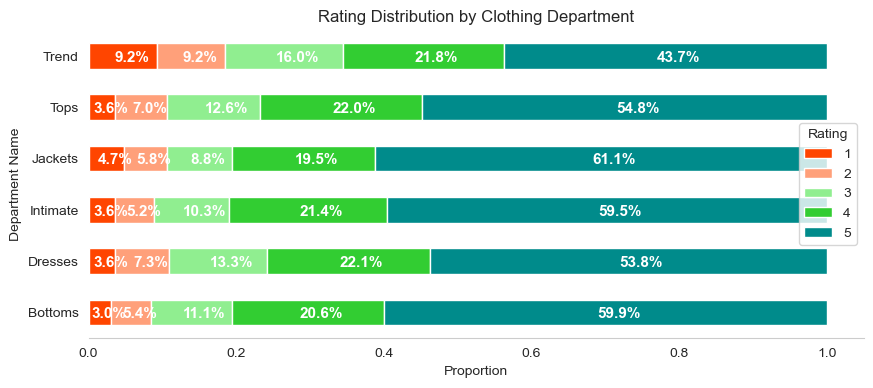

In [19]:
dep_rating = pd.crosstab(index = df['Department Name'], columns = df['Rating'], normalize = 'index')
plot_stackBars(serie = dep_rating, 
               list_colors = ['#FF4500', '#FFA07A', '#90EE90', '#32CD32', '#008B8B'], 
               label_position = 0.0115, 
               figsize = (10, 4),
               title = "Rating Distribution by Clothing Department", 
               relocate_legend = False)

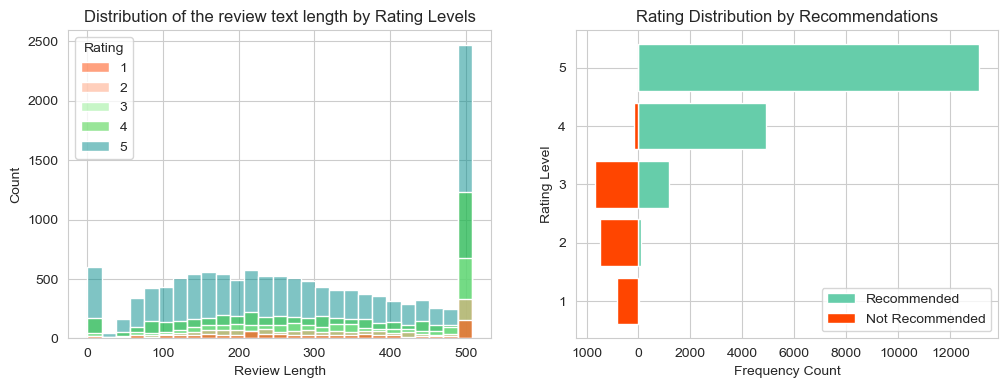

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

sns.histplot(x = df['Review Length'], hue = df['Rating'], ax = ax1,
             palette = ['#FF4500', '#FFA07A', '#90EE90', '#32CD32', '#008B8B'])
ax1.set(title = 'Distribution of the review text length by Rating Levels')


plot_recommentation('Rating', ax2)
ax2.set(title = 'Rating Distribution by Recommendations', ylabel = 'Rating Level')

plt.show()

The distributions above tell that 5-star reviews are dominant in each age group, department, length of the reviews, and in the entire dataset. Customers are moslty satisfied with what they bougth online.
- Again, the customers in their 80s+ are more likely to give a 5-star rating to their purchases, followed by people in their 60s.
- `Jackets` receive a higher number of 5-star ratings among all clothing departments.
- It seems that as the rating of the review increases, the review gets lengthier and more descriptive. It shows that the happy customers want to share more of their findings with others.
- From the `Rating Distribution by Recommendations chart:` an item with at least a 3-star rating or more will be recommended by the buyer.
- Interestingly, the 5-star reviews and the recommended articles are dominant in all scenarios. This gives me a speculation that the dataset is fairly biaised. The Women Clothing E-commerce appears to be too good to be true: most of the customers who shopped online are satisfied with their purchases. My other theory is that the given anonymous Women E-commerce shop does in fact sell good quality clothing items. It would be nice to have the names of the E-commerce so I can make my personal online shopping experience more pleasing.

### 4.Data Analysis by Positive Feedback Counts

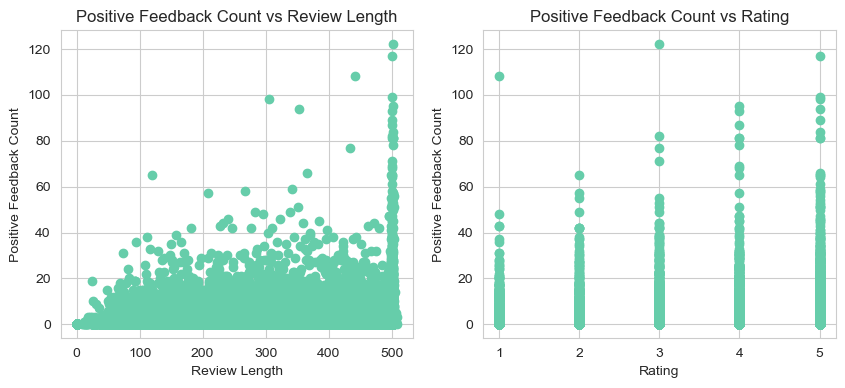

In [22]:
# Relationship between Positive Feedback
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10, 4))

ax1.scatter(df['Review Length'], df['Positive Feedback Count'], color = '#66CDAA')
ax1.set(title = 'Positive Feedback Count vs Review Length', xlabel = 'Review Length', ylabel = 'Positive Feedback Count')

ax2.scatter(df['Rating'], df['Positive Feedback Count'], color = '#66CDAA')
ax2.set(title = 'Positive Feedback Count vs Rating', xlabel = 'Rating', ylabel = 'Positive Feedback Count')

plt.show()

It appears that there is some positive correlation between `Positive Feedback Count` and `Review Length`, and between `Positive Feedback Count` and `Rating`. However, the correlation coefficients (see correlation table below) confirm partially the stated hypothesis: 
- as `Review Length` increases by 1 unit (or by 1 word in this context), `Positive Feedback Count` increases by 0.208. In other words, people will find the reviews useful if the reviews are lengthy and descriptive, which aligns with our initial statement.
- as `Rating` increases by 1 unit,  `Positive Feedback Count` decreases by 0.065, which refutes our initial observation. In the plot above, it seems that there are few outliers which need to be dropped. Clearly, if we remove the outliers, we can see that the reviews will get more feedbacks as the reviews get a better rating.
- Hence, further data cleaning, data analysis and studies (Linear Regression) are required to have a better understanding of the relationship between the reviews and the `Positive Feedback`.

In [23]:
df[['Positive Feedback Count', 'Review Length', 'Rating']].corr()

,Positive Feedback Count,Review Length,Rating
Positive Feedback Count,1.000000,0.208822,-0.064961
Review Length,0.208822,1.000000,-0.073289
Rating,-0.064961,-0.073289,1.000000


### Which clothing department got the most positive feedbacks?

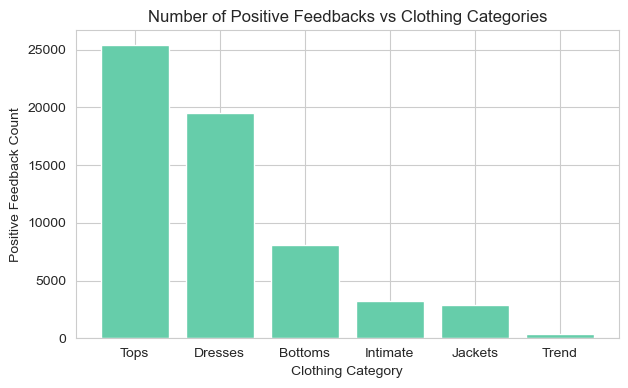

In [24]:
fig, ax = plt.subplots(figsize = (7,4))
gr = df.groupby('Department Name')['Positive Feedback Count'].sum().sort_values(ascending=False)
ax.bar(gr.index.values, gr.values, color = '#66CDAA')
ax.set(title = 'Number of Positive Feedbacks vs Clothing Categories', 
       xlabel = 'Clothing Category', ylabel = 'Positive Feedback Count')
plt.show()

### Which clothing IDs got reviewed more than once?

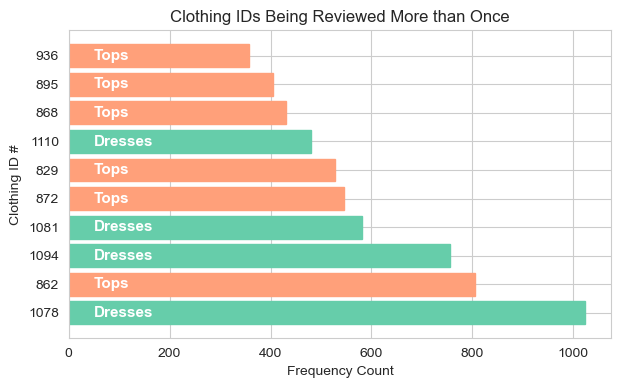

In [25]:
# prepare data
clothingID_most_reviewed = df.groupby('Clothing ID')['Rating'].count().sort_values(ascending=False).head(10)

# convert clothing ID of type 'int' to 'string' type (for bar plot)
clothingID_most_reviewed.index = [str(clothing_id) for clothing_id in clothingID_most_reviewed.index.values.tolist()]
mort_reviewed_department = []

# find the department name (clothing category) for each Clothing ID
for clothing_id, nb_reviews in zip(clothingID_most_reviewed.index, clothingID_most_reviewed.values):
    department_name = df[df['Clothing ID']==int(clothing_id)]['Department Name'].iloc[0]
    mort_reviewed_department.append(department_name)
    
# plot
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(clothingID_most_reviewed.index, clothingID_most_reviewed.values)
ax.set(title = 'Clothing IDs Being Reviewed More than Once', xlabel = 'Frequency Count', ylabel = 'Clothing ID #')

# add Department Name text in each bar
for bar, name in zip(ax.patches, mort_reviewed_department):
    ax.text(50, bar.get_y() + bar.get_height()/2, name, color = 'white', ha = 'left', va = 'center', fontsize=11,
                 fontweight="bold")
    bar.set_color('#66CDAA' if name == 'Dresses' else '#FFA07A')

plt.show()

The plot above shows the top 10 Clothing IDs that have been reviewed more than once (at least by more than 300 different customers). The clothing categories are `Dresses` (clothing IDs: 1078, 1094, 1081 and 1110) and `Tops` (clothing IDs: 862, 872, 829, 868, 895 and 936).

## Sentimental Analysis using NLTK and NLP

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import unicodedata
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

### 1. Text Pre-processing

In [27]:
# The Women Clothing E-commerce reviews contain NaN values...
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               2
Class Name                    2
Age Group                     0
Review Length                 0
dtype: int64

In [28]:
# Now, let's select non missing values reviews
reviews = df[~df['Review Text'].isna()]

In [29]:
def merge_title_reviews(row):
    '''
    This function merges the data from the columns 'title' and 'reviews' together.
    '''
    if type(row['Title']) == float:
        return row['Review Text']
    else:
        return row['Title'] + ' ' + row['Review Text']

# merge 'Title' and 'Reviews' together and select necessary columns for sentimental analysis
reviews['Text'] = reviews.apply(lambda row: merge_title_reviews(row), axis = 1)
reviews = reviews[['Text', 'Recommended IND']]
reviews

,Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1
...,...,...
23481,Great dress for many occasions I was very happ...,1
23482,Wish it was made of cotton It reminds me of ma...,1
23483,"Cute, but see through This fit well, but the t...",0
23484,"Very cute dress, perfect for summer parties an...",1


In [30]:
def clean_data(text):
    '''
    This function perform a basi data cleaning on the given text data
    
    :param [text]: text data/review
    :type [text]: string
    
    :return : processed text data
    :rtype : string
    '''
    
    # remove punctuation and numbers
    text = re.sub(r'[^A-Za-z]', ' ', text)
    
    # remove stop words and perform lemmanization
    stopword = nltk.corpus.stopwords.words('english')
    wordnet_lemmatizer = WordNetLemmatizer()
    
    cleaned_text = ''
    for word in text.split():
        if word not in stopword:
            cleaned_text += wordnet_lemmatizer.lemmatize(word) + ' '
    
    
    return cleaned_text

Now, with the function defined above, we can apply the data cleaning process on the review text and split the dataset into training and testing sets. 

For this sentimental analysis on the Women Clothing E-commerce reviews, we will use the **TF-IDF** (which stands for Term Frequency-Inverse Document Frequency) instead of Bag of Words (BoW). 
- The `Bag of Words` computes the frequency of words and finds the most occurred words in the entire corpus as the most important features (which make them as a generic word). 
- On the contrary, with `TF-IDF`, we will find a set of words that are very specific to the recommended items based on the reviews. It will emphasize in the words that occur less frequently in the entire dataset but that occur in the specific classification labels. Hence, **TF-IDF** will be used in this sentimental analysis.

In [31]:
# Define X,y variables and split into training and testing sets
X = reviews['Text'].apply(lambda text: clean_data(text))
y = reviews['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=101)

# TF-IDF
tf = TfidfVectorizer(strip_accents='ascii', 
                     lowercase = True, 
                     max_df = 0.5)
X_train = tf.fit_transform(X_train).toarray()     # fit_transform on training data
X_test = tf.transform(X_test).toarray()           # transform on testing data 

### 2. Model

In [32]:
def evaluate_model(y_true, y_pred):
    """
    This function computes the classification metrics for the classification model.
    """
    # rename the binary labels to 'positive' or 'negative'
    y_true = np.where(y_true == 1, 'Recommended', 'Not Recommended')
    y_pred = np.where(y_pred == 1, 'Recommended', 'Not Recommended')
    
    # Classification metrics
    print(classification_report(y_true, y_pred))
    
    # plot Confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels = ['Not Recommended', 'Recommended']).plot(ax = ax)
    plt.show()

### 2.1. Logistic Regression

                 precision    recall  f1-score   support

Not Recommended       0.81      0.57      0.67      1222
    Recommended       0.91      0.97      0.94      5571

       accuracy                           0.90      6793
      macro avg       0.86      0.77      0.80      6793
   weighted avg       0.89      0.90      0.89      6793



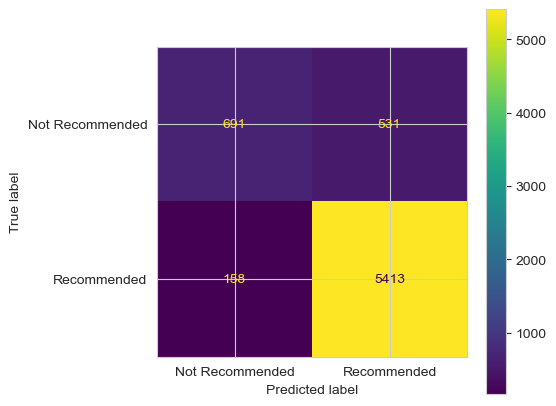

In [33]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)           
y_pred_LR = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_LR)

The accuracy of 90% suggests that the Logistic Regression model is performing well. The predicted labels are correctly classified 90.0 % of the time.
- About 97.0% of the predicted *Recommended* labels are correctly classified.
- About 57.0% of the predicted *Not Recommended* labels are correctly classified.

### 2.2 Random Forest Classifier

                 precision    recall  f1-score   support

Not Recommended       0.89      0.30      0.45      1222
    Recommended       0.87      0.99      0.92      5571

       accuracy                           0.87      6793
      macro avg       0.88      0.65      0.69      6793
   weighted avg       0.87      0.87      0.84      6793



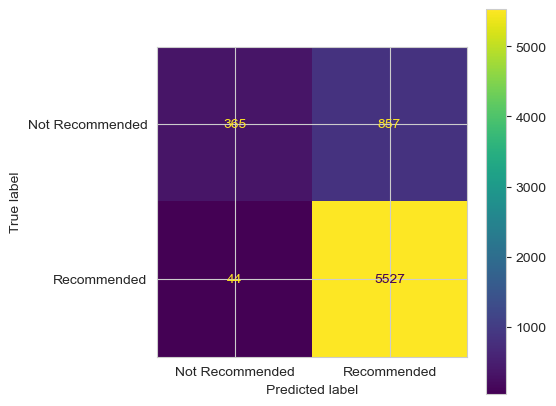

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)           
y_pred_RF = rfc.predict(X_test)
evaluate_model(y_test, y_pred_RF)

With Random Forest Classifier, the accuracy is about 87.0%, which makes this model slightly less performant than Logistic Regression.
- About 99.0% of the predicted *Recommended* labels are correctly classified.
- About 29.0% of the predicted *Not Recommended* labels are correctly classified.

### 2.3 Naive Bayes

                 precision    recall  f1-score   support

Not Recommended       0.20      0.69      0.31      1222
    Recommended       0.85      0.39      0.54      5571

       accuracy                           0.45      6793
      macro avg       0.53      0.54      0.42      6793
   weighted avg       0.74      0.45      0.50      6793



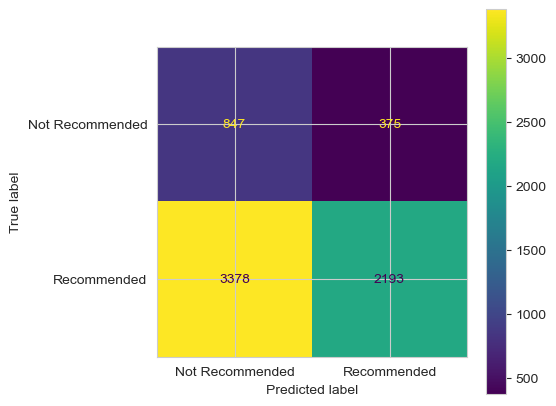

In [35]:
nb = GaussianNB()
nb.fit(X_train,y_train)           
y_pred_NB = nb.predict(X_test)
evaluate_model(y_test, y_pred_NB)

It appears that Naive Bayes Classifier is not the ideal model to choose for sentimental analysis in this scenario. The accuracy has dropped to 45 %.
- About 39.0% of the predicted *Recommended* labels are correctly classified.
- About 69.0% of the predicted *Not Recommended* labels are correctly classified.
___
Clearly, the `Logistic Regression` model performs marginally better than the `Random Forest` model by approximately 3 % and the `Naive Bayes` model by approximately 45 %. It has the highest scores in terms of performance metrics. We can compare the three models using the ROC curves presented below.

In [36]:
def get_roc_prob_scores(model, xtest):
    '''
    This function computes the ROC curve results given the model and the set of X-test
    
    :param [model]: classification model
    :param [xtest]: X_test
    :type [model]: sklearn
    :type [xtest]: sklearn
    
    :return : scores of ROC curve (auc, fpr, tpr)
    :rtype : float
    '''
    # predict probabilities for given model
    probs = model.predict_proba(xtest)[:, 1]
    
    # compute the score and ROC curve
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    return auc, fpr, tpr

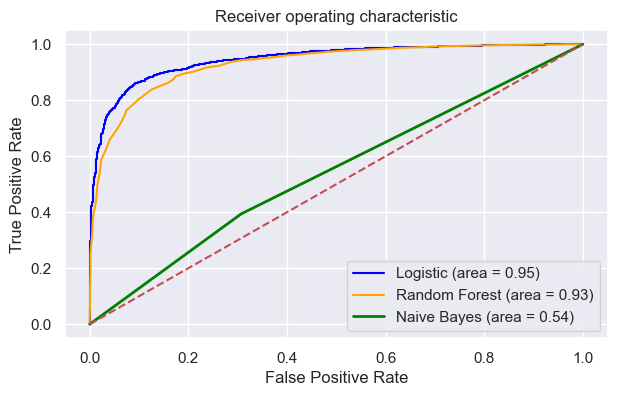

In [37]:
sns.set()
fig, ax = plt.subplots(figsize = (7,4))

# get the ROC prob and scores for all the 3 models
ls_auc, lr_fpr, lr_tpr = get_roc_prob_scores(log_reg, X_test)
rfc_auc, rfc_fpr, rfc_tpr = get_roc_prob_scores(rfc, X_test)
nb_auc, nb_fpr, nb_tpr = get_roc_prob_scores(nb, X_test)

# plot the ROC curves for each model
ax.plot(lr_fpr, lr_tpr, color = 'blue', label = 'Logistic (area = %0.2f)' % ls_auc)
ax.plot(rfc_fpr, rfc_tpr, color = 'orange', label = 'Random Forest (area = %0.2f)' % rfc_auc)
ax.plot(nb_fpr, nb_tpr, color = 'green', lw = 2, label = 'Naive Bayes (area = %0.2f)' % nb_auc)
ax.plot([0,1], [0,1], 'r--')

# set legend and labels
plt.title('Receiver operating characteristic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()

### 3. Conclusion

Once again, `Logistic Regression` outperforms other classification models. Its ROC curve is the steepest towards the y-axis, indicating a higher *True Positive Rate*. This implies that Logistic Regression correctly identifies a greater number of Recommended reviews. Moreover, it has the largest area under the curve at 0.95, whereas Random Forest and Naive Bayes models have smaller areas of 0.93 and 0.54, respectively.

From the ROC curves plotted above, it is evident that Naive Bayes is not an ideal model for this specific sentimental analysis. Its ROC curve is biased towards the x-axis (False Positive Rate), implying that the model predicts Recommended reviews inaccurately.

For future sentimental analysis projects, it would be interesting to consider using the KNN algorithm or the hyperparameter tuning for text classification.